# En este notebook se calculara y guardará un AlphaSet

In [39]:
import sys
import os
import pickle
import time
import matplotlib.pyplot as plt


sys.path.append("src")
from src.AlphaSet import AlphaSet
import numpy as np

___

## Parámetros para el AlphaSet
- I: Dimensión del Movimiento Browniano
- J: Largo de los alphas que generan los Polinomios de Wick
- K: Grado máximo de los Polinomios de Wick
- n: Cantidad de divisiones de tiempo para el Movimiento Browniano
- T: Tiempo total del Movimiento Browniano
- NNormals: Cantidad de Normales (Omegas) que se van a generar para entrenar / evaluar el modelo

In [43]:
I, J, K, n, T, NNormals = 1, 100, 1, 50, 0.5, 5
batch_size = 10  # Para calcular en tandas
SEED = 69
pkl_file = f"files/alpha_set_I{I}_J{J}_K{K}_n{n}_T{T}_Normals{NNormals}.pkl"

___

## Generar el AlphaSet

In [44]:
# Cargar o crear
np.random.seed(SEED)
if os.path.exists(pkl_file):
    with open(pkl_file, "rb") as f:
        aset = pickle.load(f)
else:
    aset = AlphaSet(I, J, K, n, T)
    aset.calculate_alphas_fast()

# Bucle incremental
start = time.time()
while len(aset.normals) < NNormals:
    remaining = NNormals - len(aset.normals)
    b = min(batch_size, remaining)
    normals = np.random.normal(size=(b, I, J))
    aset.add_normals(normals)

    # checkpoint
    with open(pkl_file, "wb") as f:
        pickle.dump(aset, f)
    print(f"Guardadas {len(aset.normals)}/{NNormals}")
end = time.time() - start
print(f"Tiempo total: {end:.2f} segundos")
print("AlphaSet completo ✔")

Guardadas 5/5
Tiempo total: 0.02 segundos
AlphaSet completo ✔


___

In [ ]:
import matplotlib.pyplot as plt

def plot_brownian_paths(alpha_set, ax=None):

    if not alpha_set.brownian_paths:
        raise ValueError("No existe tal alpha_set.")

    t = alpha_set.t

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))
    else:
        fig = ax.figure

    for idx, path in enumerate(alpha_set.brownian_paths):
        ax.plot(t, path[0], label=f"ω = {idx}")

    ax.set_xlabel("t")
    ax.set_ylabel(r"$W_{t}$")
    ax.set_title(f"Brownian paths, I={alpha_set.I}, J={alpha_set.J}")
    ax.grid(True)
    ax.legend(frameon=False, ncol=2)
    

    plt.show()




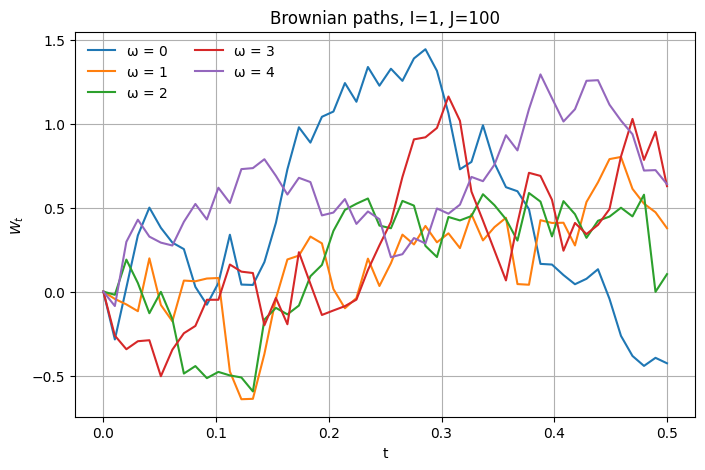

In [45]:
import pickle

fname = "files/alpha_set_I1_J100_K1_n50_T0.5_Normals5.pkl"

with open(fname, "rb") as f:
    aset = pickle.load(f)
plot_brownian_paths(aset)